In [1]:
import os
import pandas as pd
from utils.evaluation_utils import get_spatial_analysis_results, calculate_percentage_improvement
import matplotlib.pyplot as plt

if "notebooks" in os.getcwd():
    os.chdir("..")
import matplotlib as mpl

In [2]:
# Remove comment out for latex style font rendering (you need it installed on your system)
mpl.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Latin Modern Roman"],
        "axes.labelsize": 25,  ##25 for multiplot, 16 otherwise
        "font.size": 25,  ##25 for multiplot, 16 otherwise
        "legend.fontsize": 16,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "text.latex.preamble": r"\usepackage{amsmath}",
        "legend.title_fontsize": 16,
    }
)

In [3]:
results_df = get_spatial_analysis_results(
    {
        1: [i for i in range(377, 445)],
        4: [i for i in range(298, 366)],
        8: [i for i in range(252, 320)],
    }
)
arch_to_label = {
    "mlp": "MLP",
    "lstm": "LSTM",
    "gcn": "GCN",
    "gcn_lstm": "GCN-LSTM",
    "persistence": "Persistence",
}
results_df["model_architecture"] = results_df["model_architecture"].map(arch_to_label)

wandb: Currently logged in as: brandlq (brandlq-university-of-passau) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


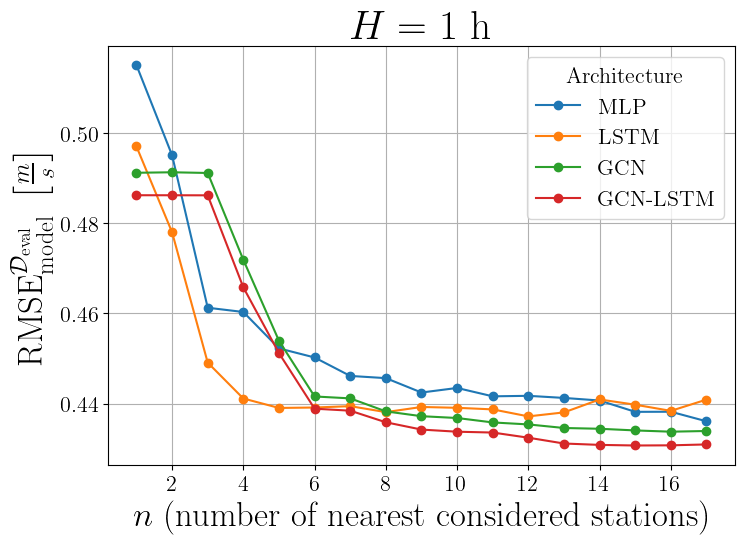

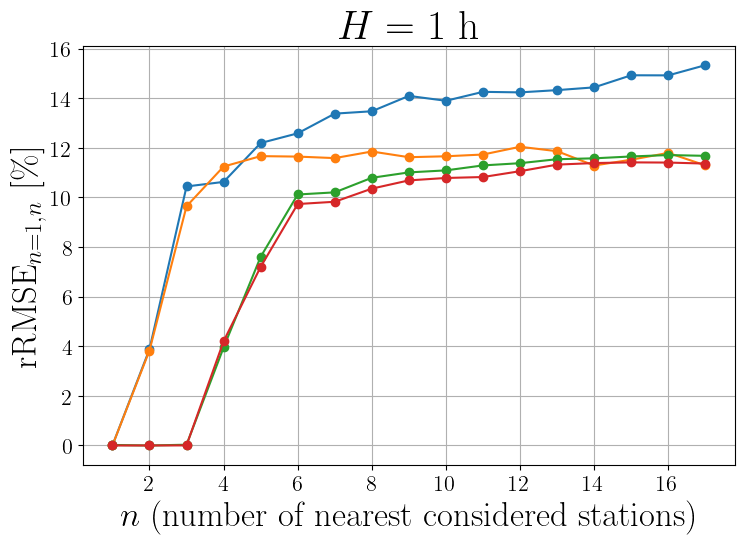

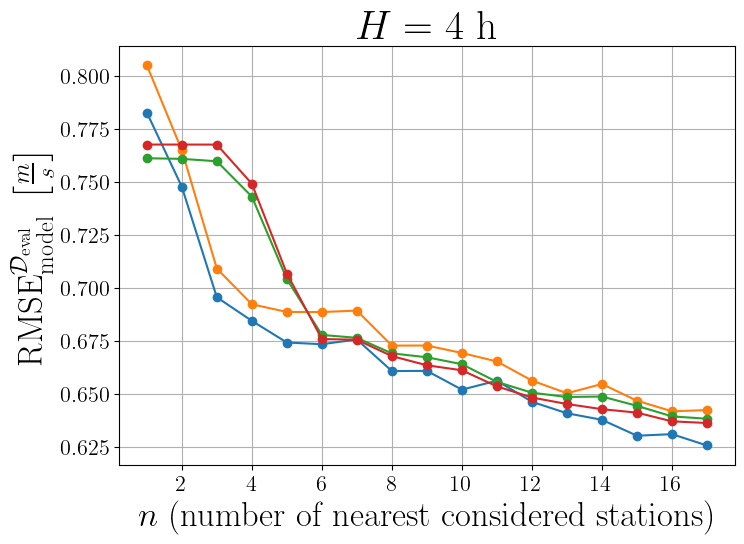

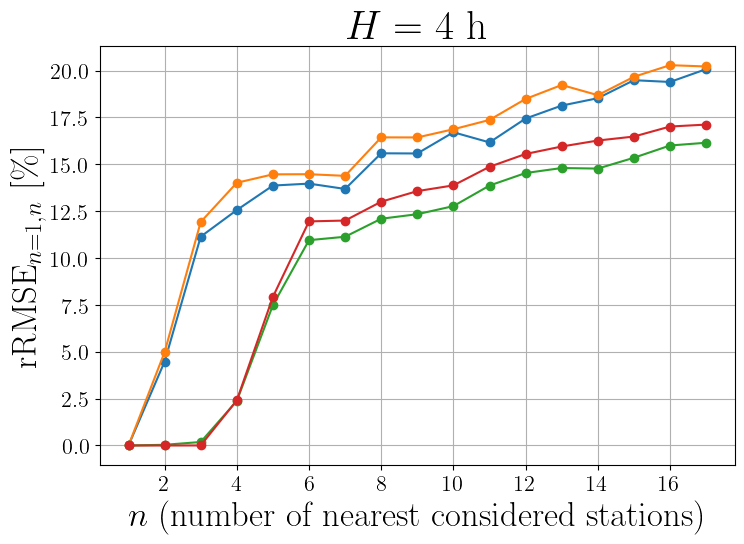

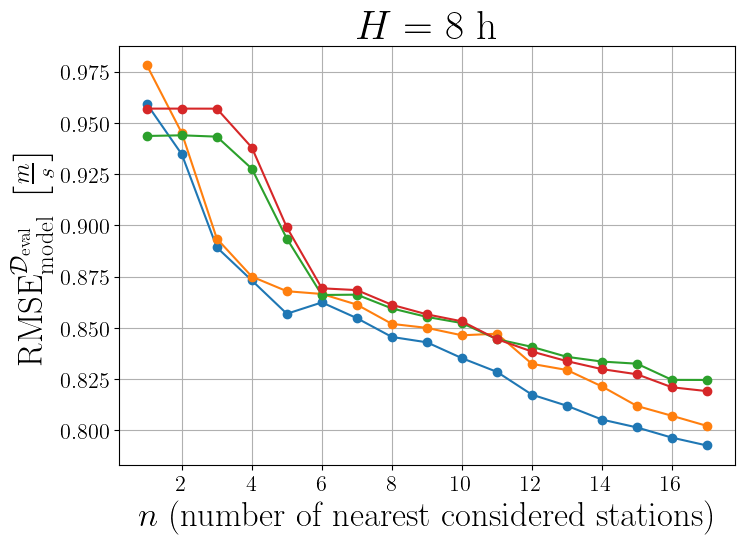

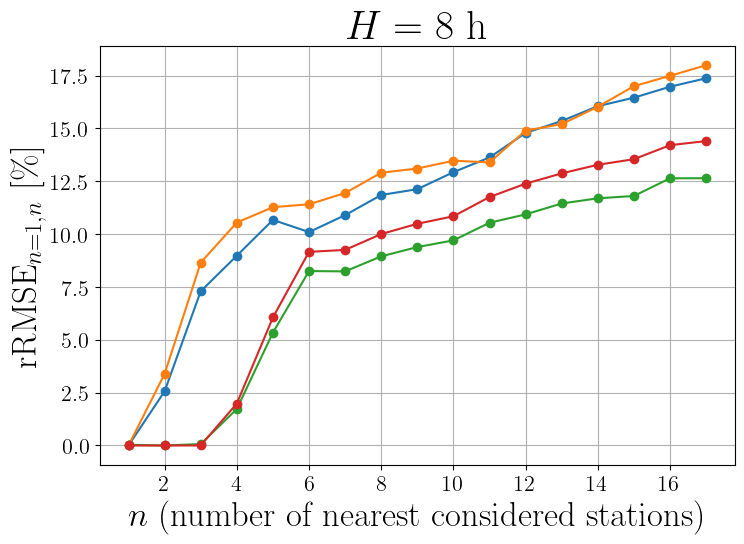

In [4]:
for forecasting_hours in [1, 4, 8]:
    plt.figure(figsize=(8, 6))
    forecasting_hours_subset = results_df[results_df["forecasting_hours"] == forecasting_hours]
    for arch in ["MLP", "LSTM", "GCN", "GCN-LSTM"]:
        arch_subset = forecasting_hours_subset[
            forecasting_hours_subset["model_architecture"] == arch
        ].sort_values(by="number_of_stations")
        plt.plot(
            arch_subset["number_of_stations"],
            arch_subset["RMSE"],
            marker="o",
            label=arch,
        )

    plt.xlabel(r"$n$ (number of nearest considered stations)")
    plt.ylabel(
        r"$\text{RMSE}^{\mathcal{D}_{\text{eval}}}_\text{model} \; \left[ \frac{m}{s} \right]$"
    )
    if forecasting_hours == 1:
        plt.legend(title="Architecture")
    plt.title(rf"$H = {forecasting_hours}$ h")
    plt.grid()
    plt.tight_layout()
    plt.savefig(
        f"notebooks/plots/spatial_analysis/{forecasting_hours}_hour_forecasting_abs.png", dpi=300
    )

    plt.figure(figsize=(8, 6))
    for arch in ["MLP", "LSTM", "GCN", "GCN-LSTM"]:
        arch_subset = forecasting_hours_subset[
            forecasting_hours_subset["model_architecture"] == arch
        ].sort_values(by="number_of_stations")
        plt.plot(
            arch_subset["number_of_stations"],
            calculate_percentage_improvement(arch_subset["RMSE"].max(), arch_subset["RMSE"]),
            marker="o",
            label=arch,
        )

    plt.xlabel(r"$n$ (number of nearest considered stations)")
    plt.ylabel(r"$\text{rRMSE}_{n = 1,n}$ [\%]")
    plt.title(rf"$H = {forecasting_hours}$ h")
    plt.grid()
    plt.tight_layout()
    plt.savefig(f"notebooks/plots/spatial_analysis/{forecasting_hours}_hour_forecasting_rel.png")

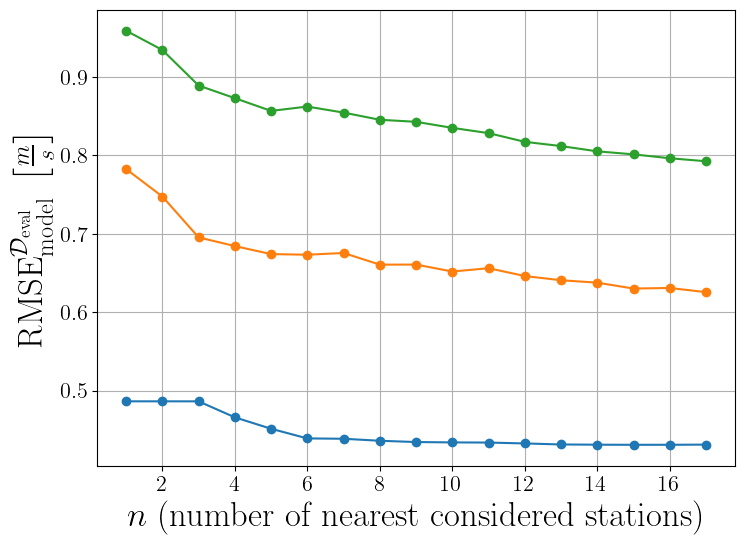

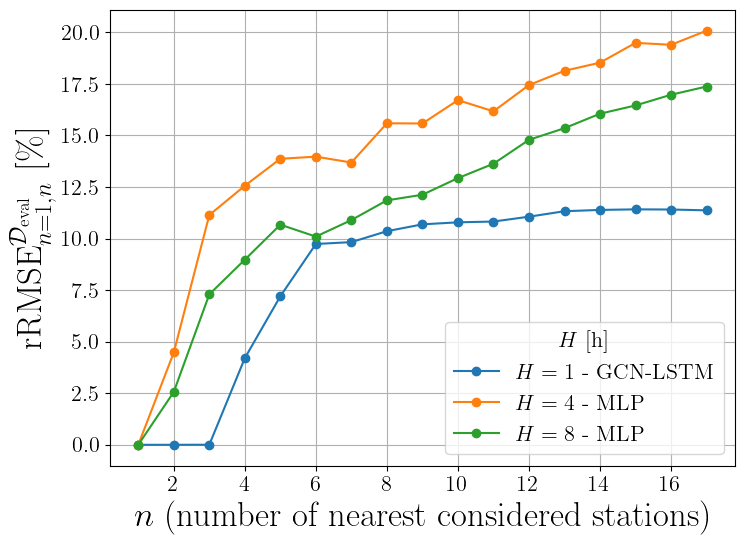

In [5]:
plt.figure(figsize=(8, 6))
for forecasting_hours, model_arch in {1: "GCN-LSTM", 4: "MLP", 8: "MLP"}.items():
    subset = results_df[
        (results_df["forecasting_hours"] == forecasting_hours)
        & (results_df["model_architecture"] == model_arch)
    ].sort_values(by="number_of_stations")

    plt.plot(
        subset["number_of_stations"],
        subset["RMSE"],
        marker="o",
        label=rf"$H = {forecasting_hours}$ - {model_arch}",
    )

plt.xlabel(r"$n$ (number of nearest considered stations)")
plt.ylabel(r"$\text{RMSE}^{\mathcal{D}_{\text{eval}}}_\text{model} \; \left[ \frac{m}{s} \right]$")
plt.grid()
plt.tight_layout()
plt.savefig("notebooks/plots/spatial_analysis/multi_hor_abs")

plt.figure(figsize=(8, 6))
for forecasting_hours, model_arch in {1: "GCN-LSTM", 4: "MLP", 8: "MLP"}.items():
    subset = results_df[
        (results_df["forecasting_hours"] == forecasting_hours)
        & (results_df["model_architecture"] == model_arch)
    ].sort_values(by="number_of_stations")
    plt.plot(
        subset["number_of_stations"],
        calculate_percentage_improvement(subset["RMSE"].max(), subset["RMSE"]),
        marker="o",
        label=rf"$H = {forecasting_hours}$ - {model_arch}",
    )

plt.legend(title=r"$H$ [h]")
plt.xlabel(r"$n$ (number of nearest considered stations)")
plt.ylabel(r"$\text{rRMSE}_{n = 1,n}^{\mathcal{D}_\text{eval}}$ [\%]")
plt.grid()
plt.tight_layout()
plt.savefig(f"notebooks/plots/spatial_analysis/multi_hor_rel")

In [6]:
best_configs = results_df.loc[
    (results_df.groupby(["forecasting_hours", "model_architecture"])["RMSE"].idxmin())
]
display(best_configs)

,forecasting_hours,run_id,model_architecture,station_ids,number_of_stations,RMSE
55,1,432,GCN,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",16,0.433763
66,1,443,GCN-LSTM,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",15,0.430701
8,1,385,LSTM,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",12,0.437156
4,1,381,MLP,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",17,0.436067
82,4,312,GCN,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",17,0.638163
87,4,317,GCN-LSTM,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",17,0.636146
111,4,341,LSTM,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",16,0.641678
72,4,302,MLP,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",17,0.625538
150,8,266,GCN,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",17,0.824623
155,8,271,GCN-LSTM,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",17,0.819168


In [7]:
best_configs[best_configs["number_of_stations"] != 17]

,forecasting_hours,run_id,model_architecture,station_ids,number_of_stations,RMSE
55,1,432,GCN,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",16,0.433763
66,1,443,GCN-LSTM,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",15,0.430701
8,1,385,LSTM,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",12,0.437156
111,4,341,LSTM,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",16,0.641678


In [8]:
results_df[(results_df["forecasting_hours"] == 1) & (results_df["model_architecture"] == "GCN")].sort_values("number_of_stations")

,forecasting_hours,run_id,model_architecture,station_ids,number_of_stations,RMSE
10,1,387,GCN,[04745],1,0.491182
11,1,388,GCN,"[04745, 02014]",2,0.491293
44,1,421,GCN,"[04745, 02014, 00691]",3,0.491136
45,1,422,GCN,"[04745, 02014, 00691, 00704]",4,0.471880
46,1,423,GCN,"[04745, 02014, 00691, 00704, 01975]",5,0.453923
47,1,424,GCN,"[04745, 02014, 00691, 00704, 01975, 00662]",6,0.441574
12,1,389,GCN,"[04745, 02014, 00691, 00704, 01975, 00662, 03093]",7,0.441151
48,1,425,GCN,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",8,0.438266
49,1,426,GCN,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",9,0.437198
50,1,427,GCN,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",10,0.436797


In [11]:
best_overall_results = results_df.loc[results_df.groupby(["forecasting_hours"])["RMSE"].idxmin()]
best_overall_results

,forecasting_hours,run_id,model_architecture,station_ids,number_of_stations,RMSE
66,1,443,GCN-LSTM,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",15,0.430701
72,4,302,MLP,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",17,0.625538
140,8,256,MLP,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",17,0.792649


In [12]:
best_overall_results["improvement"] = None
for idx, row in best_overall_results.iterrows():
    baseline = results_df[
        (results_df["forecasting_hours"] == row["forecasting_hours"])
        & (results_df["number_of_stations"] == 1) & (results_df["model_architecture"] == row["model_architecture"])
    ].iloc[0]
    print(baseline["RMSE"])
    best_overall_results.at[idx, "improvement"] = calculate_percentage_improvement(
        baseline["RMSE"], row["RMSE"]
    )

display(best_overall_results)

0.486199763912904
0.782666222330331
0.959280788930641


,forecasting_hours,run_id,model_architecture,station_ids,number_of_stations,RMSE,improvement
66,1,443,GCN-LSTM,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",15,0.430701,11.414853
72,4,302,MLP,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",17,0.625538,20.076029
140,8,256,MLP,"[04745, 02014, 00691, 00704, 01975, 00662, 030...",17,0.792649,17.370535
